In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re, string
from nltk.corpus import stopwords
from wordcloud import WordCloud
%matplotlib inline

You can see this notebook and get CSV file in: https://www.kaggle.com/leopoldozanellato/womens-ecommerce-eda-and-nlp-with-predict

If you like this notebook please upvoted

In [2]:
train = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)

In [3]:
train.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
train.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
train.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

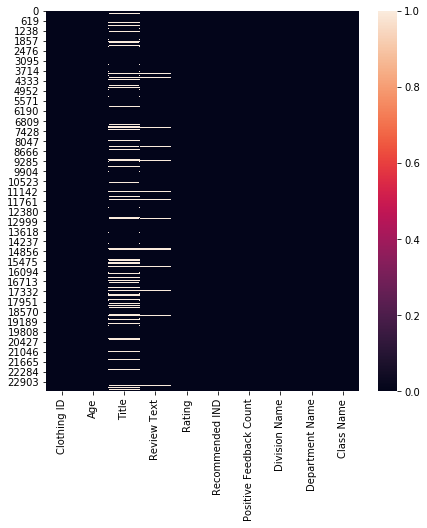

In [7]:
plt.figure(figsize=(7,7))
sns.heatmap(train.isnull())

So, we have Title with 3800 null cells, and Review Text with 845.
I can just drop null cels or fill with something.

First: My target will be Recommended IND
My X will be just Recommended IND or Recommended IND + Title

Let's see what is missing in Review Text:
Probably just filled 'Rating' and Recommended IND and who filled did not want to fill another option.

In [8]:
train[train['Review Text'].isnull()].head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits
93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses
98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear
135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits
142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear


We have more nun values.. let's see:

In [9]:
none = train[train['Division Name'].isnull()]
none

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,492,48,NaN,NaN,5,1,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


We can see that all 'Division Name', 'Department', and Class Name are null values...
Interesting that we have repeated values in 'Clothing ID'

So probably its a store registration error, and should be fixed by the E-Commerce.
Here, I'm going to fill everything with "none".

In [10]:
none['Clothing ID'].unique()

array([ 72, 492, 152, 184, 772, 665, 136], dtype=int64)

In [11]:
train.fillna('none', inplace=True)

Let's see how many ratings we have in each "class rating"

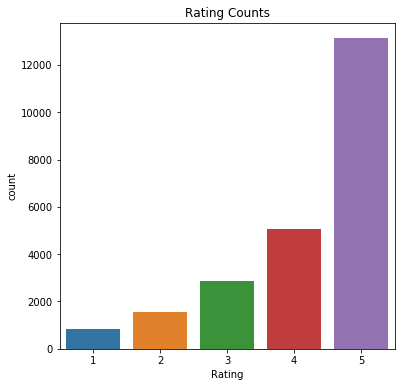

In [12]:
plt.figure(figsize=(6,6))
plt.title('Rating Counts')
sns.countplot(train['Rating'])

Almost all of them are 4 or 5 and how many uniques objects we have in each object column?

In [13]:
objectcol = train.select_dtypes(include='object')
for col in objectcol.columns:
    print(f'{col}: {train[col].nunique()}')

Title: 13994
Review Text: 22635
Division Name: 4
Department Name: 7
Class Name: 21


Next, we can see which of them have more Positive Feedback Count?
It's important because if someone make a bad feedback, and a lot of people see, people can stop to by just because of this Review.. so, let's see something about it

In [14]:
train.sort_values(by='Positive Feedback Count', ascending = False).head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
7218,1092,34,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,3,1,122,General,Dresses,Dresses
1294,1095,29,none,I've been on the hunt for the perfect dress to...,5,1,117,General,Dresses,Dresses
7765,986,43,Quality does not merit cost,"I generally don't write bad reviews, but there...",1,0,108,General,Jackets,Jackets
19094,1121,35,A navy trench-yes!,I am a big fan of trench coats and i love that...,5,1,99,General,Jackets,Outerwear
13210,1078,23,"Super flattering, beautiful dress",This is my favorite dress i've bought in the p...,5,1,98,General,Dresses,Dresses


We can see the first, second and third with more counts...
The first is rating 3,
second is rating 5,
and last one is rating 1


In [15]:
train.sort_values(by='Positive Feedback Count', ascending = False)['Review Text'][0]

'Absolutely wonderful - silky and sexy and comfortable'

In [16]:
train.sort_values(by='Positive Feedback Count', ascending = False)['Review Text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [17]:
train.sort_values(by='Positive Feedback Count', ascending = False)['Review Text'][1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [18]:
department = train[['Department Name', 'Rating']].groupby('Department Name').mean().sort_values(by='Rating', ascending = False)

In [19]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(float(rect.get_height()),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

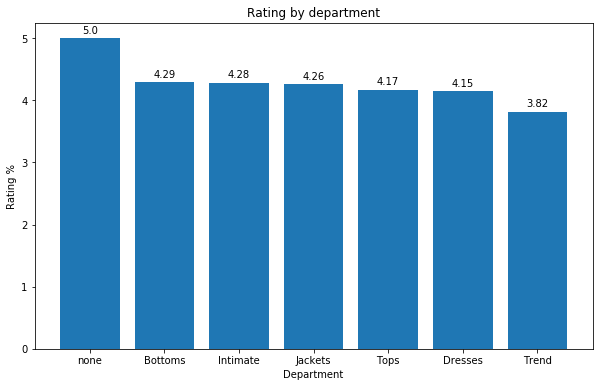

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
rect1 = ax.bar(x=department.index, height=department['Rating'])
plt.title('Rating by department')
plt.ylabel('Rating %')
plt.xlabel('Department')
autolabel(rect1)

Which class have the best rating? 

In this chart we see that Casual Bottons get the best rating, in next chart we see that younger people buy more Casual Bottoms than older people

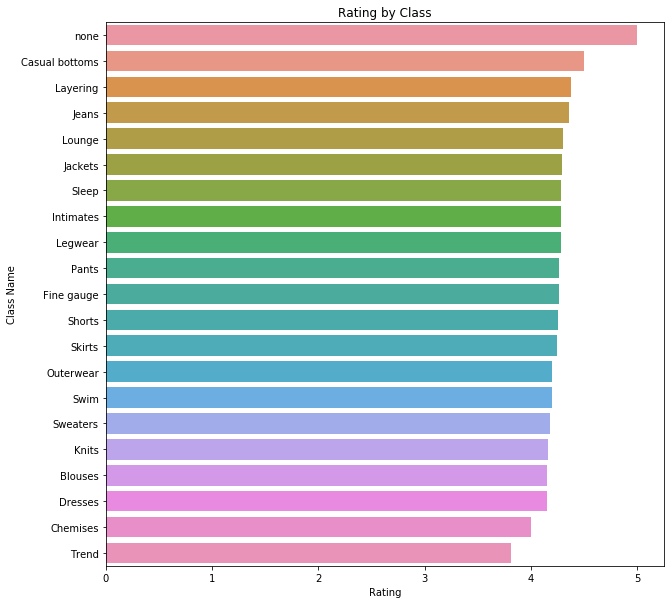

In [21]:
class_name = train[['Class Name', 'Rating']].groupby('Class Name').mean().sort_values(by='Rating', ascending = False)
plt.figure(figsize=(10,10))
plt.title('Rating by Class')
sns.barplot(y=class_name.index, x=class_name['Rating'])

Text(0.5, 0, 'Age')

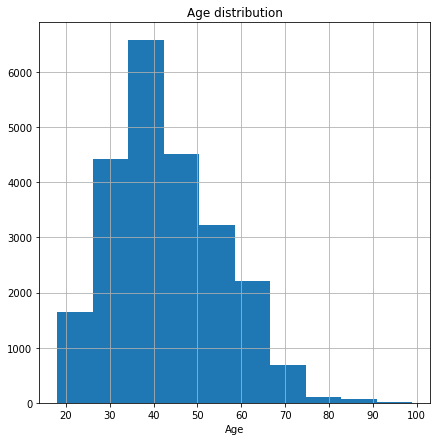

In [22]:
plt.figure(figsize=(7,7))
plt.title('Age distribution')
train['Age'].hist()
plt.xlabel('Age')

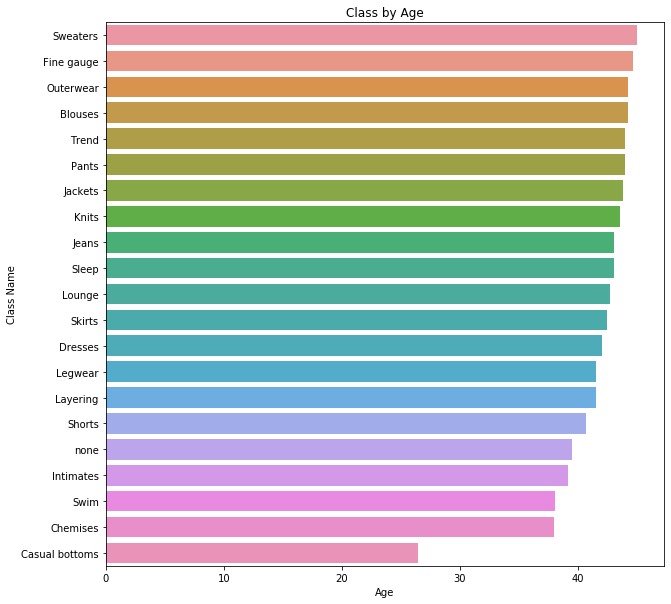

In [23]:
age = train[['Class Name','Age']].groupby('Class Name').mean().sort_values(by='Age', ascending = False)
age
plt.figure(figsize=(10,10))
plt.title('Class by Age')
sns.barplot(y=age.index, x=age['Age'])

Now I'll clean the reviews and create another column with the new text.
I will create a list with Review Text words and Title words 

In [24]:
def get_text(text):
    text = text.lower()

    text = re.sub("I'm",'I m',text)
    text = re.sub(":", " ", text)
    text = re.sub("He's","he is", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    text = re.sub(r"[00-99]", "", text)
    text = re.sub(r"none", "", text)

    nopunc = [char for char in text if char not in string.punctuation] # del punctuation
    nopunc = "".join(nopunc)
    
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]   # or get_stop_words('english')
    clean = " ".join(clean)
    
    clean2 = [word for word in clean.split() if len(word) > 1] # get len more than 1 (del A, I, s, d)
    clean2 = " ".join(clean2)
    return clean2

In [25]:
train['Review Text1'] = train['Review Text'].apply(get_text)
train['Title1'] = train['Title'].apply(get_text)

In [26]:
lista = []
for word in train['Review Text1']:
    word = word.split()
    for n in word:
        lista.append(n)
        
lista = " ".join(lista)

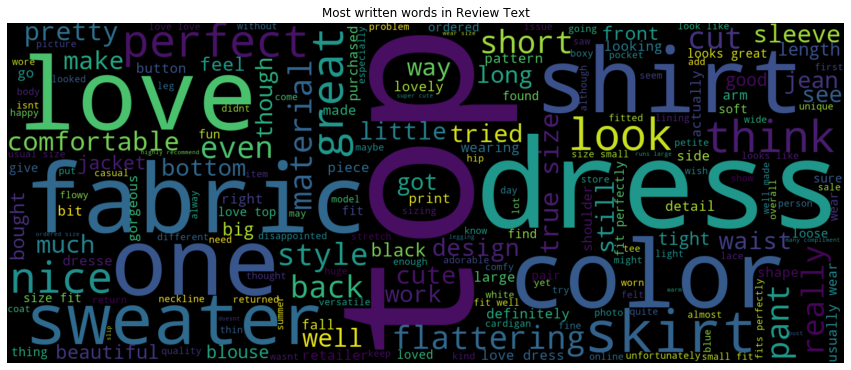

In [27]:
wordcloud = WordCloud(width=1600, height=650, margin=0).generate(lista)

plt.figure(figsize=(15,15))
plt.title('Most written words in Review Text')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [28]:
lista1 = []
for word in train['Title1']:
    word = word.split()
    for n in word:
        lista1.append(n)
lista1 = " ".join(lista1)

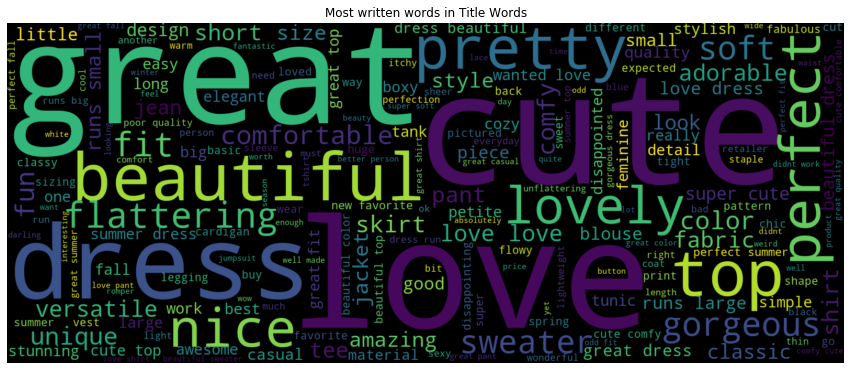

In [29]:
wordcloud1 = WordCloud(width=1600, height=650, margin=0).generate(lista1)
plt.figure(figsize=(15,15))
plt.title('Most written words in Title Words')
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [30]:
recommended = train[train['Recommended IND']==1]
recommended_list = []
for word in recommended['Review Text1']:
    word = word.split()
    for n in word:
        recommended_list.append(n)
recommended_list = " ".join(recommended_list)

In [31]:
not_recommended_list = []
not_recommended = train[train['Recommended IND']==0]
for word in not_recommended['Review Text1']:
    word = word.split() 
    for n in word:
        not_recommended_list.append(n)
not_recommended_list = " ".join(not_recommended_list)

In [32]:
recomendedcloud = WordCloud(width=1600, height=650, margin=0).generate(recommended_list)
notrecomendedcloud = WordCloud(width=1600, height=650, margin=0).generate(not_recommended_list)

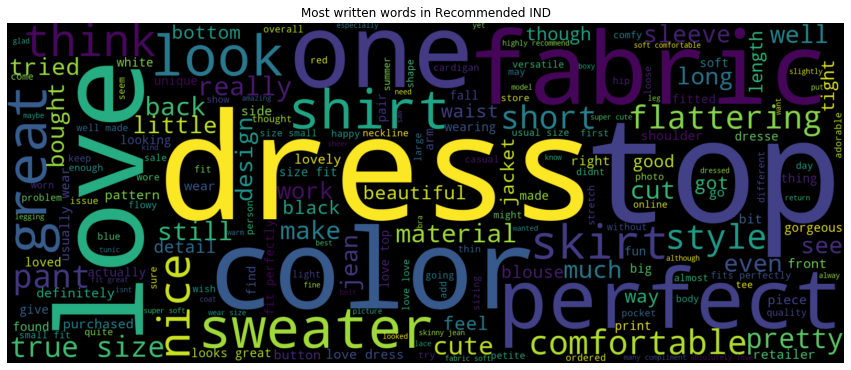

In [33]:
plt.figure(figsize=(15,15))
recomendedcloud
plt.imshow(recomendedcloud, interpolation='bilinear')
plt.title('Most written words in Recommended IND')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()



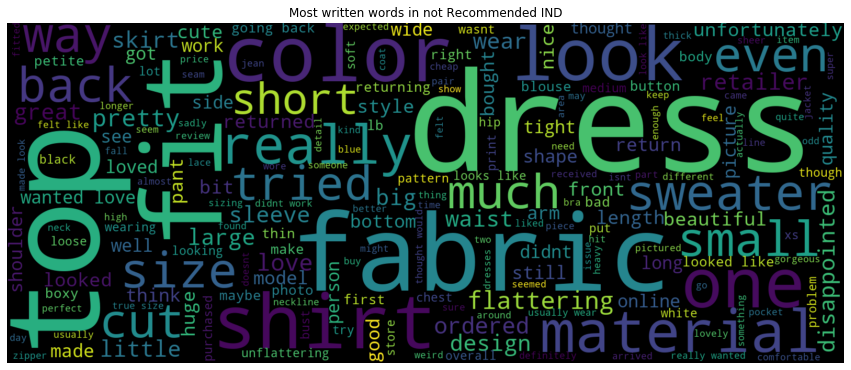

In [34]:
plt.figure(figsize=(15,15))
notrecomendedcloud
plt.imshow(notrecomendedcloud, interpolation='bilinear')
plt.title('Most written words in not Recommended IND')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**MODEL AND TRAIN SPLIT**

First test x = 'review text1'
           y = 'Recommended IND'
          
 Models:
*  Random Forest
*  Naive Bayes

In [35]:
x=train['Review Text1']
y=train['Recommended IND']

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(x)

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest = train_test_split(X,y, random_state = 42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(xtrain,ytrain)
predict_rf = model_rf.predict(xtest)

In [39]:
scoretest_rf = model_rf.score(xtest,ytest)
print(f' Score Test: {scoretest_rf}')
print(classification_report(ytest,predict_rf))

 Score Test: 0.848433242506812
              precision    recall  f1-score   support

           0       0.85      0.20      0.32      1064
           1       0.85      0.99      0.91      4808

    accuracy                           0.85      5872
   macro avg       0.85      0.60      0.62      5872
weighted avg       0.85      0.85      0.81      5872



In [40]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
nb_predict = nb.predict(xtest)

In [41]:
scoretest_nb = nb.score(xtest,ytest)
print(f' Score Test: {scoretest_nb}')
print(classification_report(ytest,nb_predict))

 Score Test: 0.8862397820163488
              precision    recall  f1-score   support

           0       0.72      0.60      0.66      1064
           1       0.92      0.95      0.93      4808

    accuracy                           0.89      5872
   macro avg       0.82      0.78      0.79      5872
weighted avg       0.88      0.89      0.88      5872



In [42]:
from sklearn.metrics import confusion_matrix
random_forest_matrix = confusion_matrix(ytest,predict_rf)
random_forest_matrix

array([[ 212,  852],
       [  38, 4770]], dtype=int64)

In [43]:
nb_matrix = confusion_matrix(ytest,nb_predict)
nb_matrix

array([[ 643,  421],
       [ 247, 4561]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix Naive Bayes')

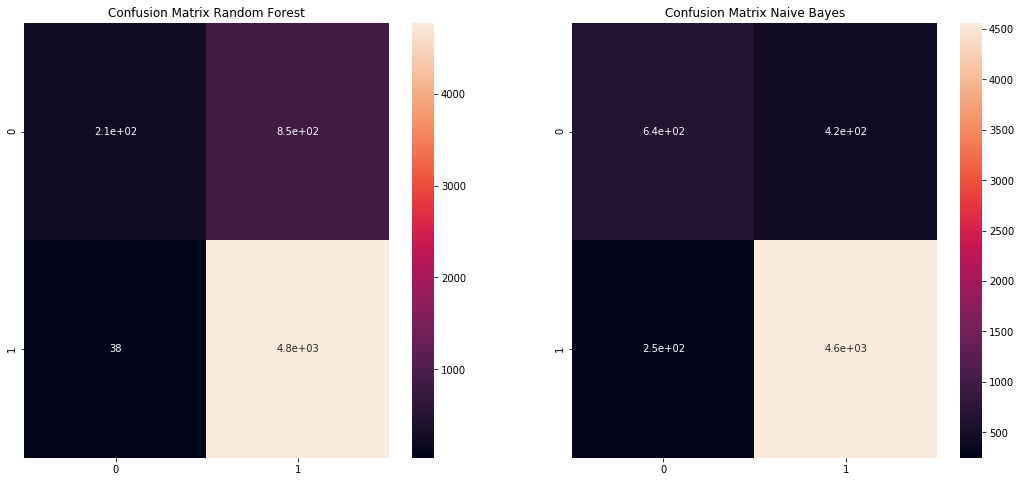

In [44]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[0] = sns.heatmap(random_forest_matrix, annot=True, ax=ax[0])
ax[0].set_title('Confusion Matrix Random Forest')
ax[1] = sns.heatmap(nb_matrix,annot=True, ax=ax[1])
ax[1].set_title('Confusion Matrix Naive Bayes')

Now, I going to create a new feature:
    'Review Text' + 'Title'

In [45]:
def get_all(col):
    review_text = col[0]
    title = col[1]
    text = str(review_text) + str(title)
    return text


train['full'] = train[['Review Text1', 'Title1']].apply(lambda x: get_all(x), axis=1)

In [46]:
train.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Text1,Title1,full
0,767,33,none,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable,,absolutely wonderful silky sexy comfortable
1,1080,34,none,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretty happened find store gla...,,love dress sooo pretty happened find store gla...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work initially ...,major design flaws,high hopes dress really wanted work initially ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...,favorite buy,love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie perf...,flattering shirt,shirt flattering due adjustable front tie perf...


**MODEL WITH NEW FEATURE**

In [47]:
xbest=train['full']
y=train['Recommended IND']

In [48]:
cv = CountVectorizer()
Xbest = cv.fit_transform(xbest)
xtrain, xtest,ytrain,ytest = train_test_split(Xbest,y, random_state = 42)

In [49]:
model_rf_full = RandomForestClassifier(random_state=42)
model_rf_full.fit(xtrain,ytrain)
predict_rf_full = model_rf_full.predict(xtest)

In [50]:
scoretest_rf_full = model_rf_full.score(xtest,ytest)
print(f' Score Test: {scoretest_rf_full}')
print(classification_report(ytest,predict_rf_full))

 Score Test: 0.8446866485013624
              precision    recall  f1-score   support

           0       0.91      0.16      0.27      1064
           1       0.84      1.00      0.91      4808

    accuracy                           0.84      5872
   macro avg       0.88      0.58      0.59      5872
weighted avg       0.85      0.84      0.80      5872



In [51]:
nb_full = MultinomialNB()
nb_full.fit(xtrain,ytrain)
nb_predict_full = nb_full.predict(xtest)

In [52]:
nb_score_test = nb_full.score(xtest,ytest)
print(f' Score Test: {nb_score_test}')
print(classification_report(ytest,nb_predict_full))

 Score Test: 0.8894754768392371
              precision    recall  f1-score   support

           0       0.78      0.54      0.64      1064
           1       0.90      0.97      0.93      4808

    accuracy                           0.89      5872
   macro avg       0.84      0.75      0.79      5872
weighted avg       0.88      0.89      0.88      5872



In [53]:
rf_matrix_full = confusion_matrix(ytest,predict_rf_full)
rf_matrix_full

array([[ 169,  895],
       [  17, 4791]], dtype=int64)

In [54]:
nb_matrix_full = confusion_matrix(ytest,nb_predict_full)
nb_matrix_full

array([[ 575,  489],
       [ 160, 4648]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix Naive Bayes')

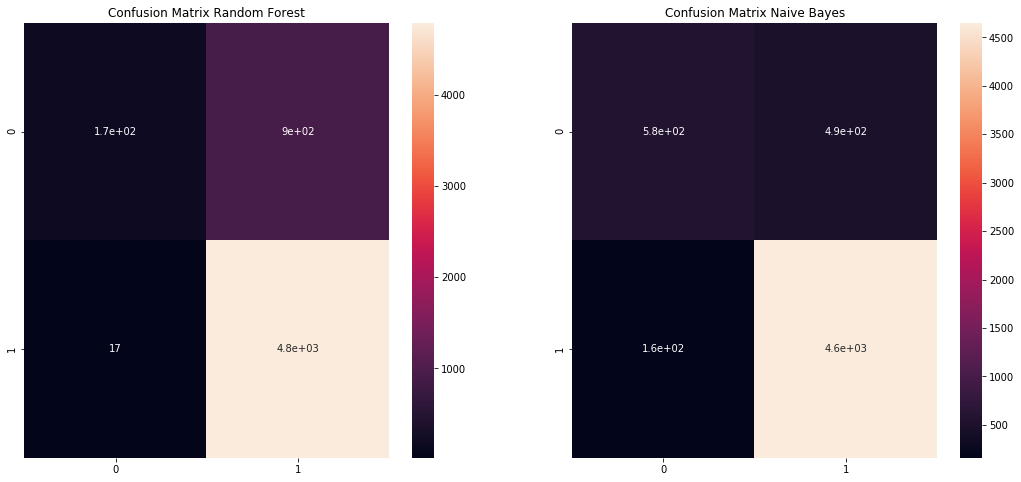

In [55]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[0] = sns.heatmap(rf_matrix_full, annot=True, ax=ax[0])
ax[0].set_title('Confusion Matrix Random Forest')
ax[1] = sns.heatmap(nb_matrix_full,annot=True, ax=ax[1])
ax[1].set_title('Confusion Matrix Naive Bayes')

In [56]:
print(f' First NB test: {scoretest_nb}')
print(f' First RF test: {scoretest_rf}')
print(f' Second NB test: {nb_score_test}')
print(f' Second RF test: {scoretest_rf_full}')

 First NB test: 0.8862397820163488
 First RF test: 0.848433242506812
 Second NB test: 0.8894754768392371
 Second RF test: 0.8446866485013624


We got a best score with multinominal, but with new feature we did not improve so much.

If you like this notebook please upvote